In [1]:
%matplotlib inline
#enable plotting inline within the notebook

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]
#make the plots larger -- numbers are x and y, in inches

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
#this just allows me to increase the width of the notebook display

/var/folders/cg/ldp5srbn6_3cc82bbxc26ppw0000gn/T/ipykernel_9995/1105276753.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Big-Picture-Exercise" data-toc-modified-id="Big-Picture-Exercise-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Big Picture Exercise</a></span></li><li><span><a href="#The-signal-and-the-noise" data-toc-modified-id="The-signal-and-the-noise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The signal and the noise</a></span></li><li><span><a href="#Probability" data-toc-modified-id="Probability"><span class="toc-item-num">3&nbsp;&nbsp;</span>Probability</a></span></li><li><span><a href="#Statistical-distributions" data-toc-modified-id="Statistical-distributions-3"><span class="toc-item-num">4&nbsp;&nbsp;</span>Statistical distributions</a></span><ul class="toc-item"><li><span><a href="#Informal-definitions:-what-is-a-distribution?" data-toc-modified-id="Informal-definitions:-what-is-a-distribution?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Informal definitions: what <em>is</em> a distribution?</a></span><ul class="toc-item"><li><span><a href="#Informal-definition-1:" data-toc-modified-id="Informal-definition-1:-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Informal definition 1:</a></span></li><li><span><a href="#Informal-definition-2:" data-toc-modified-id="Informal-definition-2:-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Informal definition 2:</a></span></li></ul></li><li><span><a href="#The-rules:-properties-of-all-probability-distributions" data-toc-modified-id="The-rules:-properties-of-all-probability-distributions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>The rules: properties of all probability distributions</a></span></li></ul></li><li><span><a href="#The-Gaussian-distribution-(and-how-to-work-with-it-in-Python)" data-toc-modified-id="The-Gaussian-distribution-(and-how-to-work-with-it-in-Python)-4"><span class="toc-item-num">5&nbsp;&nbsp;</span>The Gaussian distribution (and how to work with it in Python)</a></span><ul class="toc-item"><li><span><a href="#Generating-and-plotting-the-shape-of-the-Gaussian-distribution" data-toc-modified-id="Generating-and-plotting-the-shape-of-the-Gaussian-distribution-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Generating and plotting the shape of the Gaussian distribution</a></span></li><li><span><a href="#Generating-Gaussian--distributed-random-numbers-in-Python" data-toc-modified-id="Generating-Gaussian--distributed-random-numbers-in-Python-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Generating Gaussian  distributed random numbers in Python</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Gaussian-random-numbers-with-numpy" data-toc-modified-id="Exercise:-Gaussian-random-numbers-with-numpy-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Exercise: Gaussian random numbers with numpy</a></span></li></ul></li></ul></li><li><span><a href="#The-Poisson-distribution" data-toc-modified-id="The-Poisson-distribution-5"><span class="toc-item-num">6&nbsp;&nbsp;</span>The Poisson distribution</a></span><ul></div>

## Big Picture Exercise

This session's materials include two actual data sets that have been taken from http://www.randomservices.org/random/ (a really nice resource!).


* Michelsons_Velocity_of_Light_Data.dat
    * This table gives Albert Michelson's measurements of the velocity of light in air, made from June 5 to July 2, 1879. The given values are the speed of light in km/s **minus 299,000 km/s**

* Prussian_Horse-Kick_Data.dat
    * This table gives the number of soldiers in the Prussian cavalry killed by horse kicks, by corp membership and by year. The years are from 1875 to 1894, and there are 14 different cavalry corps: the first column corresponds to the guard corp and the other columns to corps 1 through 11, 14, and 15. The data are from Distributome project and are derived from the book by Andrews and Herzberg. The original source of the data is the classic book by von Bortkiewicz, "The Law of Small Numbers"
    
Our Big Picture Exercise today is to inspect and summarize these data sets and compare them to the theoretical distributions that might describe them. Here are some specific things to do and try. 

* Velocity of Light
    * Inspect the velocity of light data set and plot a histogram these values
        * does it look reasonable? why/why not?
    * Work out the mean ($\bar{x}$) and standard deviation ($s_x$) of the measurements
    * Use np.linspace to create a set of 1001 points between $\bar{x} - 5 s_x$ and  $\bar{x} + 5s_x$
    * Use scipy.stats.norm.pdf to generate $p(x)$ for your 1001 points
    * Replot your histogram, but this time adding the "normed=True" keyword which forces plt.hist to normalize the histogram
    * Overplot your $p(x)$ as a smooth line on top of the histogram
    * Do they agree reasonably well?
    * Velocity of Light
    * Inspect the velocity of light data set and plot a histogram these values
        * does it look reasonable? why/why not?
    * Work out the mean ($\bar{x}$) and standard deviation ($s_x$) of the measurements
    * Use np.linspace to create a set of 1001 points between $\bar{x} - 5s_x$ and  $\bar{x} + 5s_x$
    * Use scipy.stats.norm.pdf to generate $p(x)$ for your 1001 points, for your mean and standard deviation
    * Replot your histogram
        * but this time add the "density=True" keyword, which forces plt.hist to normalize the histogram
    * Overplot your $p(x)$ as a smooth line on top of the histogram
    * Do they agree reasonably well?
    

* Horsekick Data
    * Let's check if the data is consistent with the rate of these deaths being constant across corps and years
    * If that's the case, we'd expect the probability of seeing N deaths in any one corp and year to follow the Poisson distribtion
    * Work out the *average* number of deaths per corp and year -- this is $\mu$ for our Poisson distribution
    * For N between zero and four (the maximum number observed in the data set), use the data to estimate the probability of finding $N$ deaths in any given corp and year
        * we have a total of 14 corps and 20 years, so 14 x 20 = 280 observations
        * our estimate of the probability of finding zero deaths is therefore the fraction of zeros among those 280 numbers (and the same for finding 1, 2, 3 and 4 deaths)
        * for N = 0, 1, 2, 3, 4, work out the Poisson probability of finding $N$, given $\mu$
        * print the observed and predicted rates side by side -- do they look compatible?

# Lesson 8: 
# Probability and noise distributions

## Statistical distributions

Let's begin by asking ourselves of what a "statistical distribution" actually is. 

### Informal definitions: what *is* a distribution? 

* When we say "a number is drawn from drawn from a population with some distribution", we mean that the probability that our number has any  particular value is given by that distribution.

* As a short-hand, we often just talk about "a number is drawn from a  distribution" (i.e. skipping the population bit).

* What all of this this means is this: **if we make a histogram of lots of numbers drawn in this way, that histogram will *eventually* look like the "underlying" distribution.**

#### Informal definition 1:

**A probability distribution tells us how likely it is that a random draw of some quantity will yield a particular result.**

For example, if a quantity is described by a uniform distribution between zero and one, we immediately know that every real number between zero and one is equally likely to be drawn.

Another, perhaps even more intuitive, definition is to just slightly formalize our statement about the relationship between distributions and histograms:

#### Informal definition 2:

**If we make a histogram of values drawn from a given distribution, the shape of that histogram will tend towards the distribution as the number of draws gets larger and larger.**


     [animation 1 -- code on Blackboard]

This is actually a pretty nice, visual definition of what a probability distribution really is. It basically follows immediately from the first definition, but it's perhaps more concrete and easier to visualize.

### The rules: properties of all probability distributions

There are some basic rules that *any* self-respecting probability distribution has to follow. 

* "the distribution must measure the probability content"
<br><br>
    * for continuous outcomes (e.g. real numbers), we refer to the distribution as $p(x)$
        * the probability that an outcome is between $x$ and $x + dx$ is then just $p(x) dx$
<br><br>
    * for discrete outcomes (e.g. integers), we refer to the distribution as $p(k)$
        * the probability that the outcome is exactly $k$ is then just $p(k)$

* "probabilities cannot be negative"<br><br>
$$p(x) \geq 0 \,\,\,\, {\rm for\,\, all}\,\, x$$
<br><br>
$$p(k) \geq 0 \,\,\,\, {\rm for\,\, all}\,\, k$$

* "the combined probability of all possible outcomes must be 100%"<br><br>
$$\int_{-\infty}^{\infty} p(x) dx = 1.$$
<br><br>
$$\sum_{all\,k} p(k) = 1.$$

## The Gaussian distribution (and how to work with it in Python)

By far the most important distribution in all of statistics is the Gaussian distribution, aka the Normal distribution, aka the bell-shaped curve.

A Gaussian distribution is characterized by just two parameters, which are simply

* the mean $\mu$
* the standard deviation $\sigma$


Mathematically, the Gaussian distribution has the form

$$p(x\,|\,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}.$$

### Generating and plotting the shape of the Gaussian distribution

It is super-easy to create the Gaussian distribution itself, even without having to implement $p(x\,|\,\mu,\sigma)$ ourselves. For this, we can use *scipy*'s *stats.norm.pdf* function.

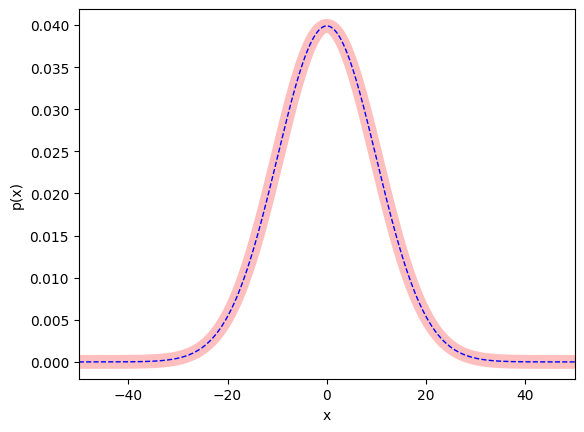

In [2]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
sigma = 10.0
mean = 0.0

#create 1001 numbers spaced evenly between -50 and 50
x = np.linspace(-50,50,1001)

#now use scipy.stats.norm, which has an inbuilt method for generating the pdf
gauss = norm.pdf(x, mean, sigma)

#we can also do it by hand
gauss2 = (1./(sigma*np.sqrt(2.*np.pi))) * np.exp((-(x-mean)**2)/(2 * sigma**2))

#let's plot this

#note that "alpha" controls the transparency of the line
#alpha = 1 is totally opaque
#alpha = 0 is totally transparent

plt.plot(x, gauss, color='red', linewidth=10, alpha=0.25)

plt.plot(x, gauss2, color='blue', linestyle='--', linewidth=1)
plt.xlim(-50.0,50.0) #set limits of x-axis
plt.xlabel('x')     #x-axis label
plt.ylabel('p(x)')     #y-axis label
plt.show()

The notation $p(x|y)$ here means "the probability distribution of $x$, given $y$". It's here to remind us that the Gaussian distribution depends the parameters $\mu$ and $\sigma$. Once we've specified these, the distribution is just a completely normal function of $x$.

Don't bother memorizing the form of the distribution -- we're providing this here just for reference.

<center>
<img src=gauss.png>
</center>



<div align="right">  <a href="https://en.wikipedia.org/wiki/Normal_distribution#/media/File:Empirical_Rule.PNG"> source of image</a></div>

Numbers worth memorizing:
* $\simeq$68% of the area under a Gaussian falls within $\pm 1\sigma$
<br><br>
* $\simeq$95% of the area under a Gaussian falls within $\pm 2\sigma$
<br><br>
* $\simeq$99.7% of the area under a Gaussian falls within $\pm 3\sigma$

### Generating Gaussian  distributed random numbers in Python

It is extremely easy and convenient to generate all sorts of different types of random numbers in *python* by using the *random* module in the *numpy* package.

Here is a little code snippet to see how this works for the Gaussian (aka "normal") distribution:

In [ ]:
# Let's generate 10,000 gaussian distributed random numbers with 
# mean = 0 and standard deviation = 10.
import numpy as np
from matplotlib import pyplot as plt
ndat = 10000
stdev = 10.0
mean = 0.0
err = np.random.normal(mean, stdev, ndat) 

#let's plot these as a histogram

nbins = 50
range = (-30.0, 30.0)
plt.hist(err, bins=nbins, range=range, color="blue")
plt.xlim(-40.0,40.0) #set limits of x-axis
plt.xlabel('x')     #x-axis label
plt.ylabel('Number of Points')     #y-axis label
plt.show()

Let's use this ability to simulate Gaussian distributed numbers to check those 1$\sigma$, 2$\sigma$ and 3$\sigma$ percentages...

                  [show animation 2 -- download code from Blackboard]

Note how fast this pdf falls off with $x$ for $x >> \sigma$. What's the percentage of values falling within $\pm 6\sigma$? The answer is 99.9999998027%. 

**Only 1 in** $\simeq$500 **million draws from a Gaussian distribution should fall outside the** $\pm 6\sigma$  **interval!**

This exponential drop-off is both a nice feature of the Gaussian distribution and a dangerous one:

* it's **nice** because it implies that we can often make very precise statements about the quantities we have measured *if* our uncertainties are well described by this distribution;
<br><br>
* it's **dangerous** because if we we're *wrong* in assuming our errors are Gaussian, the true distribution may not fall off nearly as quickly, and then our claimed uncertainties may be horribly underestimated.

The Gaussian distribution with $\mu = 0$ and $\sigma = 1$ is often referred to as the "standard Gaussian" or "standard Normal" distribution.

The standard Normal distribution can be transformed into *any* Gaussian distribution, just by shifting and stretching the $x$-axis:

$$ x(\mu,\sigma) \rightarrow x_{standard} \,\, \sigma + \mu$$

The same transformation can be applied to random numbers drawn from the standard Normal distribution to generate random numbers drawn from a Gaussian distribution with arbitrary $\mu$ and $\sigma$.

The reason for the importance of the Gaussian distribution is that it is often an excellent approximation to the  distribution(s) from which experimental uncertainties are drawn. 

This should strike us as pretty miraculous! Experimental uncertainties can be due to all sorts of things, from the limited resolution of marks on a ruler, to the limited number of counts in a cosmic ray detector, to fluctuations in the voltage supplied by the power source in our experiment. Why should all of these things produce errors that follow the same, basic distribution?

We will answer this question later.

#### Exercise: Gaussian random numbers with numpy

Use the random number generator in *numpy* to draw 10000 random numbers drawn from the standard Normal distribution. 

Transform these into random numbers drawn from the Gaussian distribution with $\mu = 10$ and $\sigma = 3$. 

Plot a histogram of your transformed random numbers and confirm that they behave as expected by overplotting the analytical Gaussian distribution with this $\mu$ and $\sigma$. You can use scipy's stats.norm.pdf function for the analytical distribution.

[Hint: the only tricky thing here is the normalization of the analytical distribution.]

## The Poisson distribution

The Poisson distribution is the second most important statistical distribution for practical data analysis, beaten to the top spot only by the Gaussian distribution. This is because it applies to just about any experimental measurement based on an *event rate* (i.e. the number of counts within some interval).

The Poisson distribution describes the probability of observing $k$ events in some given interval, if we know that the *average* number expected to occur in that interval is $\lambda$.

Purely for fun (no need to memorize this!), here is the functional form of the Poisson distribution:

$$p(k | \lambda) = \frac{e^{-\lambda}\lambda^k}{k!}$$

The symbol $k!$ denotes the *factorial*, defined as $k! = 1 \times 2 \times 3 \times ... k$.

Again, there is no need to memorize this. The important thing is to know *what it describes* and *what the input parameter $\lambda$ is*.

### Generating and plotting the shape of the Poisson distribution
This shape of this distribution -- i.e. $p(k|\lambda)$ -- is also available in *scipy*, under *stats.poisson.pmf*.

The following code uses this to plot the Poisson distribution for three different $\lambda$

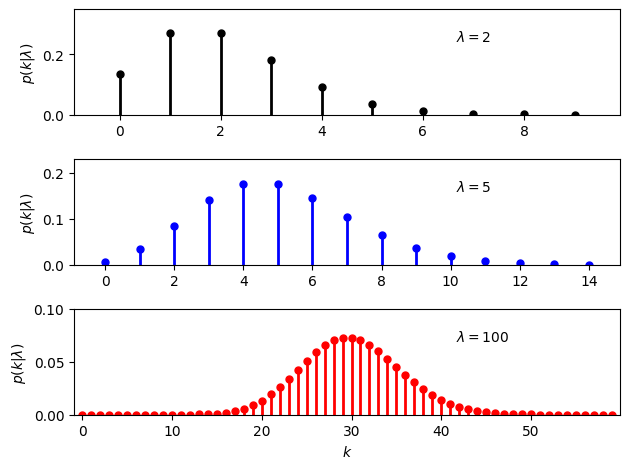

In [3]:
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt

for lamda in np.array([2.0, 5.0, 30.0]):
    if (lamda < 5):
        k = np.arange(5*lamda, dtype=int)
        p = poisson.pmf(k, lamda)
        plt.subplot(3, 1, 1)
        ymax = 0.35
        xmin = -0.9
        xmax = np.amax(k) + 0.9
        xtext = xmin + 0.7*(xmax - xmin)
        plt.xlim(xmin, xmax)
        plt.ylim(0, ymax)
        plt.ylabel(r'$p(k|\lambda)$')
        plt.text(xtext, 0.7*ymax, r'$\lambda = 2$')
        plt.plot(k, p, marker = 'o', color="black", 
                 linestyle="None", markersize=5)
        plt.vlines(k, 0, p, color="black", linewidth=2)
    elif (lamda < 10): 
        k = np.arange(3*lamda, dtype=int)
        p = poisson.pmf(k, lamda)
        plt.subplot(3, 1, 2)
        ymax = 0.23
        xmin = -0.9
        xmax = np.amax(k) + 0.9
        xtext = xmin + 0.7*(xmax - xmin)
        plt.xlim(xmin, xmax)
        plt.ylim(0, ymax)
        plt.ylabel(r'$p(k|\lambda)$')
        plt.text(xtext, 0.7*ymax, r'$\lambda = 5$')
        plt.plot(k, p, marker = 'o', color="blue", 
                 linestyle="None", markersize=5)
        plt.vlines(k, 0, p, color="blue", linewidth=2)
    else:
        k = np.arange(2*lamda, dtype=int)
        p = poisson.pmf(k, lamda)
        plt.subplot(3, 1, 3)
        ymax = 0.1
        xmin = -0.9
        xmax = np.amax(k) + 0.9
        xtext = xmin + 0.7*(xmax - xmin)
        plt.xlim(xmin, xmax)
        plt.ylim(0, ymax)
        plt.ylabel(r'$p(k|\lambda)$')
        plt.xlabel(r'$k$')
        plt.text(xtext, 0.7*ymax, r'$\lambda = 100$')
        plt.plot(k, p, marker = 'o', color="red", 
                 linestyle="None", markersize=5)
        plt.vlines(k, 0, p, color="red", linewidth=2)
plt.tight_layout()
plt.show()

The mean of the Poisson distribution is:

$$\left< \, k \, \right> = \mu = \sum_{k=0}^{\infty} k \, p(k \, | \, \lambda) = \lambda $$

The variance of the Poisson distribution is:

$$\left< \, (k-\mu)^2 \, \right> = \sigma^2 = \sum_{k=0}^{\infty}(k-\mu)^2 \, p(k \, | \, \lambda) = \lambda .$$

So the standard deviation of the Poisson distribution is:

$$\sigma = \sqrt{\lambda}$$

This is one of the most important lessons you will learn in this course. For experimental or observational physicists who usually deal with experiments that produce any sort of "event count", taking the square root of their recorded counts is practically an automatic reflex.

Be careful, however: "root N" style Poisson errors apply **only** to raw integer counts that are subject to fluctuations around some some known or estimated mean.

Poisson errors do **not** apply to any of the following:

* **count *rates***

    * suppose we record 100 counts in 100 s, so our estimate of the mean count rate is 1 c/s 
    * the standard deviation of the count rate is **not** $\sqrt{1} = 1$
    * instead, we calculate this as follows:
        * for the raw counts, $\sigma = \sqrt{100} = 10$
        * so the standard deviation of the count rate is $\frac{\sigma}{100s} = 0.1$ c/s

* **"processed" counts**
    * suppose we record 100 photons in an exposure with a CCD camera 
    * the camera electronics automatically adds an exact, constant 44 counts to this
    * the standard deviation of the processed counts is **not** $\sqrt{144} = 12$
    * instead, we calculate this as follows:
        * for the raw counts $\sigma = \sqrt{100} = 10$
        * for the processed counts the standard deviation is still $\sigma = 10$
            * adding an exact constant to a number does **not** add any uncertainty!

Note that the Poisson distribution is *asymmetric*, i.e. it has positive *skew*. It becomes more and more symmetric, however, as $\lambda$ gets larger. In this limit, it actually approaches the Gaussian distribution with $\mu = \lambda$ and $\sigma = \lambda$.

### Generating Poisson  distributed random integers in Python

The way to generate Poisson distributed random numbers with Python -- integers in this case! -- is almost exactly analogous to how we generated Gaussian distributed (real) numbers.

The relevant function in *numpy* is *numpy.random.poisson*. This takes two parameters as input:

* lam -- $\lambda$, the number expected on average
* size -- $N_{data}$, the number of random samples to generate

It then return that number (size) of random samples drawn from $p(k|\lambda)$.

Here is a little code snippet to see how this works.

#### Exercise: Poisson random numbers with numpy

Modify this simple script to plot the histograms for $\lambda = 0, 1, 3, 5, 10, 20, 50, 100, 1000$. 

Do you notice anything interesting?

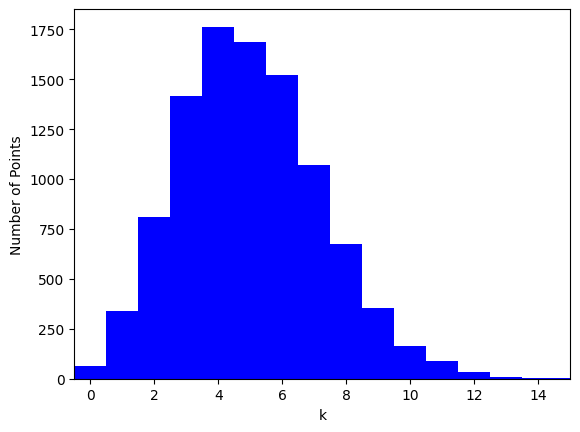

In [4]:
# Let's generate 10,000 Poisson distributed random numbers with lambda = 5.
import numpy as np
from matplotlib import pyplot as plt
ndat = 10000
lam = 5.0
counts = np.random.poisson(lam=lam, size=ndat) 

#let's plot these as a histogram

bin_edges = np.arange(-0.5,20.5,1)
nbins = 16
plt.hist(counts, bins=bin_edges, range=range, color="blue")
plt.xlim(-0.5,15.0) #set limits of x-axis
plt.xlabel('k')     #x-axis label
plt.ylabel('Number of Points')     #y-axis label
plt.show()

## (Optional:) Why are experimental errors so often Gaussian?

We noted earlier that this was the most important distribution in all of statistics and data analysis. As justification for that statement, we claimed that real observational or experimental erorrs/uncertainties are very often well-described by the Gaussian distribution.

Let's try to understand and test that claim. Should we really expect Gaussian errors to be this prevalent? Why should this be the case?

### (Optional) the central limit theorem

Suppose we have $N$ independent numbers, $z_i$, drawn at random from **ANY** distributions with mean $\mu_{i}$ and variance $\sigma_{i}^2$ (where $i = 1, 2, 3, ... , N$).

Then, in the limit $N \rightarrow \infty$, the sum of these random numbers, $Z$, is itself a random number drawn from a Gaussian distribution with mean 
$$\mu = \left< Z\right> = \sum_{i=0}^{N} \mu_i$$
and variance 
$$\sigma^2 = \left< (Z - \mu)^2 \right> = \sum_{i=0}^{N} \sigma_i^2.$$

This unassuming little statement is arguably the single most important and powerful result in all of statistics.

Let's think about what it implies:

**The central limit theorem says that *any* observational or experimental error/uncertainty that is caused by a combination of many individual smaller errors/uncertainties will tend to follow a Gaussian distribution.**

This is the case for almost all types of uncertainties or error, which is why Gaussian errors are so extremely common.


                  [show animation 3]

Let's see the beauty of the central limit theorem in practice. In the following simulation, we'll draw 1 million uniform random numbers between 0 and 1. We'll then draw another million such numbers and add them (one by one) to the first million. Then we'll draw another million and add them to the sum. And so on. 

At each step, we'll take a look at the distribution of the million numbers in the sum at the current step and compare it to a Gaussian.

#### Exercise: (Optional) the central limit theorem

The central limit theorem is actually a lot more general than our simulation suggests. In particular, we kept adding random numbers drawn from the *same* distribution with the *same* mean and *same* variance. But if you re-read our statement of the central limit theorem, you'll see that it holds much more generally than this.

Modify the animation code above to check more general cases:

1. simulate the addition of uniform random numbers with different limits
2. simulate the addition of triangular random numbers
3. simulate the addition numbers drawn from *both* distributions, say 50:50

How quickly or slowly does the sum converge to the Gaussian distribution in each of these cases?

The central limit theorem is incredibly powerful, but let's not get carried away. It doesn't magically solve all statistical problem or apply in all cases.

Limitations of the central limit theorem:

* it may take very large $N$ to converge to a Gaussian
    * so not *every* sum will actually *be* close to Gaussian
<br><br>
* the distribution tails converge more slowly than the center
    * but many decisions are based on tail probabilities
<br><br>
* even if $N$ is large, a small number of non-Gaussian components may *dominate*    
    * the resulting distribution will not be Gaussian.
<br><br>  
* the distributions we are adding must have *finite* variance
    * not all physically interesting distribution do (e.g. Cauchy aka Lorentzian).


#### Exercise: (Optional)the central limit theorem on a log-scale

Take the code for animation 5 above and plot it with a logarithmic y-axis. This gives us better insight into the behaviour of the *tails* of the distribution. Does convergence to the Gaussian still look equally 

## Big Picture Exercise

This session's materials include four actual data sets, all of which have been taken from http://www.randomservices.org/random/ (a really nice resource!).


* Michelsons_Velocity_of_Light_Data.dat
    * This table gives Albert Michelson's measurements of the velocity of light in air, made from June 5 to July 2, 1879. The given values are the speed of light in km/s **minus 299,000 km/s**

* Prussian_Horse-Kick_Data.dat
    * This table gives the number of soldiers in the Prussian cavalry killed by horse kicks, by corp membership and by year. The years are from 1875 to 1894, and there are 14 different cavalry corps: the first column corresponds to the guard corp and the other columns to corps 1 through 11, 14, and 15. The data are from Distributome project and are derived from the book by Andrews and Herzberg. The original source of the data is the classic book by von Bortkiewicz, "The Law of Small Numbers"
    
Our Big Picture Exercise today is to inspect and summarize these data sets and compare them to the theoretical distributions that might describe them. Here are some specific things to do and try. 

(Note that I don't expect everybody to do every one of these things. But you should feel that you *could* do any of them, and that you *understand* them. Also, try to pick at least some examples for both the Gaussian and the Poisson distribution.)

* Velocity of Light
    * Inspect the velocity of light data set and plot a histogram these values
        * does it look reasonable? why/why not?
    * Work out the mean ($\bar{x}$) and standard deviation ($s_x$) of the measurements
    * Use np.linspace to create a set of 1001 points between $\bar{x} - 5\s_x$ and  $\bar{x} + 5\s_x$
    * Use scipy.stats.norm.pdf to generate $p(x)$ for your 1001 points
    * Replot your histogram, but this time adding the "normed=True" keyword which forces plt.hist to normalize the histogram
    * Overplot your $p(x)$ as a smooth line on top of the histogram
    * Do they agree reasonably well?
    * Velocity of Light
    * Inspect the velocity of light data set and plot a histogram these values
        * does it look reasonable? why/why not?
    * Work out the mean ($\bar{x}$) and standard deviation ($s_x$) of the measurements
    * Use np.linspace to create a set of 1001 points between $\bar{x} - 5\s_x$ and  $\bar{x} + 5\s_x$
    * Use scipy.stats.norm.pdf to generate $p(x)$ for your 1001 points, for your mean and standard deviation
    * Replot your histogram
        * but this time add the "density=True" keyword, which forces plt.hist to normalize the histogram
    * Overplot your $p(x)$ as a smooth line on top of the histogram
    * Do they agree reasonably well?
    

* Horsekick Data
    * Work out the total number of deaths in each year
    * Work out the mean ($\bar{x}$) and standard deviation ($s_x$) of the measurements
        * Do they seem consistent with the Poisson expectation that the standard deviation is the square root of the mean?
    * Plot a histogram of these numbers
    * Work out the mean ($\bar{x}$) and standard deviation ($s_x$) of these numbers
    * Use np.arange to create a set of all *integers* between $\bar{x} - 5\s_x$ and  $\bar{x} + 5\s_x$
        * if $\bar{x} - 5\s_x$ is less than zero, start at zero
    * Use scipy.stats.poisson.pmf to generate $p(x)$ for your integers (let's call that poisson)
    * Replot your histogram, but this time such that each integer has its own "bin"
        * if your integer array is called my_ints, say, you should first define edges = my_ints - 0.5
        * then use plt.hist again, but this time use "bins=edges"
    * On top of your histogram, overplot the Poisson prediction from poisson.pmf
        * the easiest way to do this is by using plt.scatter
    * Does it more or less match the data? How might we decide?
    * Repeat the exercise above, but this time looking at the number of deaths *per corp*
        * for each corp, sum all the deaths across the years
    * Does it look like the death rates are consistent across corps?
        * i.e. does the distribution seem consistent with the Poisson distribution?